In [1]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ cotton/train'
valid_path = '/content/drive/MyDrive/ cotton/test'


In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/ cotton/train/*')

In [6]:
folders

['/content/drive/MyDrive/ cotton/train/diseased cotton leaf',
 '/content/drive/MyDrive/ cotton/train/fresh cotton leaf',
 '/content/drive/MyDrive/ cotton/train/fresh cotton plant',
 '/content/drive/MyDrive/ cotton/train/diseased cotton plant']

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 94 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
244/244 [==============================] - 1131s 5s/step - loss: 2.5584 - accuracy: 0.4516 - val_loss: 1.2093 - val_accuracy: 0.5000
Epoch 2/3
244/244 [==============================] - 349s 1s/step - loss: 1.5284 - accuracy: 0.5628 - val_loss: 1.6105 - val_accuracy: 0.5745
Epoch 3/3
244/244 [==============================] - 349s 1s/step - loss: 1.2723 - accuracy: 0.6212 - val_loss: 1.6202 - val_accuracy: 0.5957


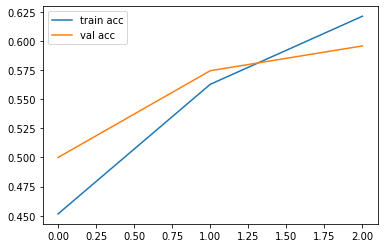

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

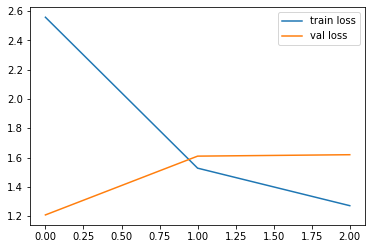

<Figure size 432x288 with 0 Axes>

In [16]:
 plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
    

In [17]:
from tensorflow.keras.models import load_model

model.save('cotton.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [18]:
!pip install streamlit &> /dev/null
!pip install pyngrok==41 .1.&> /dev/null
# Python Wrapper for NGROK Library(Tunneling Software)
# Redirects local host URL to GLobal URL